In [1]:
#This example uses Python 2.7 and the python-request library.

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com./v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'20',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '33c41d2e-a6ed-467c-8b37-a1c599d3492c',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2023-10-09T00:27:27.380Z', 'error_code': 0, 'error_message': None, 'elapsed': 21, 'credit_count': 1, 'notice': None, 'total_count': 8956}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10486, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [2]:
import pandas as pd

pd.set_option('display.max_columns', None)

In [3]:
pd.json_normalize(data['status'])

,timestamp,error_code,error_message,elapsed,credit_count,notice,total_count
0,2023-10-09T00:27:27.380Z,0,None,21,1,None,8956


In [4]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')

C:\Users\akinl\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


In [5]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10486,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.950807e+07,1.950807e+07,False,NaN,1,NaN,NaN,None,2023-10-09T00:25:00.000Z,27864.827567,7.945089e+09,23.8594,-0.237339,-0.419784,-0.181410,7.607304,-5.856532,-8.549101,5.435890e+11,49.8896,5.851614e+11,None,2023-10-09T00:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-09 00:28:03.564250
1,1027,Ethereum,ETH,ethereum,7495,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202475e+08,1.202475e+08,True,NaN,2,NaN,NaN,None,2023-10-09T00:25:00.000Z,1629.258061,3.330345e+09,30.9419,-0.174405,-0.426889,-5.607768,-0.422158,-12.237410,-13.417871,1.959142e+11,17.9949,1.959142e+11,None,2023-10-09T00:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-09 00:28:03.564250
2,825,Tether USDt,USDT,tether,63281,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.347444e+10,8.662571e+10,True,NaN,3,NaN,NaN,None,2023-10-09T00:25:00.000Z,1.000423,1.256131e+10,15.8281,-0.004859,-0.016746,0.037493,0.069805,0.114791,0.021723,8.350977e+10,7.6644,8.666238e+10,None,2023-10-09T00:25:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-10-09 00:28:03.564250
3,1839,BNB,BNB,bnb,1667,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.538457e+08,1.538457e+08,False,NaN,4,NaN,NaN,None,2023-10-09T00:25:00.000Z,210.976726,2.674899e+08,27.3987,-0.169375,-0.675389,-3.014110,-1.707039,-13.449793,-14.028855,3.245786e+10,2.9789,3.245786e+10,None,2023-10-09T00:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-09 00:28:03.564250
4,52,XRP,XRP,xrp,1108,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.338730e+10,9.998838e+10,False,NaN,5,NaN,NaN,None,2023-10-09T00:25:00.000Z,0.516969,3.586741e+08,12.8016,-0.171687,-1.027586,-1.107388,2.584554,-19.602206,8.293142,2.759959e+10,2.5350,5.169692e+10,None,2023-10-09T00:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-09 00:28:03.564250
5,3408,USDC,USDC,usd-coin,14357,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.555226e+10,2.555226e+10,False,NaN,6,NaN,NaN,None,2023-10-09T00:25:00.000Z,0.999900,1.633333e+09,40.6493,-0.006825,-0.012650,-0.024063,-0.016181,-0.014599,-0.017473,2.554971e+10,2.3468,2.554971e+10,None,2023-10-09T00:25:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-10-09 00:28:03.564250
6,5426,Solana,SOL,solana,534,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.142375e+08,5.593331e+08,True,NaN,7,NaN,NaN,None,2023-10-09T00:25:00.000Z,23.148878,1.919533e+08,-29.9442,-0.329958,-0.919527,-2.281651,18.317965,-5.168817,7.884383,9.589133e+09,0.8808,1.294793e+10,None,2023-10-09T00:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-09 00:28:03.564250
7,2010,Cardano,ADA,cardano,943,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.514850e+10,3.624429e+10,False,NaN,8,NaN,NaN,None,2023-10-09T00:25:00.000Z,0.255337,7.764466e+07,-33.5273,-0.447199,-1.225275,-3.503456,0.433648,-15.188245,-11.489838,8.974728e+09,0.8237,1.149018e+10,None,2023-10-09T00:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-09 00:28:03.564250
8,74,Dogecoin,DOGE,dogecoin,803,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me

In [6]:
def api_runner():

    global df
    
    url = 'https://pro-api.coinmarketcap.com./v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'20',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '33c41d2e-a6ed-467c-8b37-a1c599d3492c',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
       
    
 

    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df = df.append(df2)
    
    if not os.path.isfile(r'C:\Users\akinl\Documents\Data Course\api.csv'):
        df.to_csv(r'C:\Users\akinl\Documents\Data Course\api.csv', header = 'column_names')
    else: 
         df.to_csv(r'C:\Users\akinl\Documents\Data Course\api.csv', mode = 'a', header = False)

In [7]:
import os 
from time import time
from time import sleep


for i in range(333):
    api_runner()
    print('api runner completed successfully')
    sleep(60)
exit()

{'status': {'timestamp': '2023-10-09T00:29:05.731Z', 'error_code': 0, 'error_message': None, 'elapsed': 25, 'credit_count': 1, 'notice': None, 'total_count': 8956}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10486, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

C:\Users\akinl\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\akinl\AppData\Local\Temp\ipykernel_8976\1213875591.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


KeyboardInterrupt: 

In [8]:
df72 = pd.read_csv(r'C:\Users\akinl\Documents\Data Course\api.csv')
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10486,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.950792e+07,1.950792e+07,False,NaN,1,NaN,NaN,NaN,2023-10-08T20:58:00.000Z,27922.454827,7.551559e+09,-0.3180,0.072155,-0.036920,2.983368,7.846013,-5.267987,-9.334426,5.447090e+11,49.8624,5.863716e+11,NaN,2023-10-08T20:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-08 21:00:56.122270
1,1,1027,Ethereum,ETH,ethereum,7495,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.202475e+08,1.202475e+08,True,NaN,2,NaN,NaN,NaN,2023-10-08T20:58:00.000Z,1637.272061,3.228826e+09,12.1066,0.045428,0.220745,-2.235085,0.090587,-11.571414,-13.472361,1.968779e+11,18.0219,1.968779e+11,NaN,2023-10-08T20:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-08 21:00:56.122270
2,2,825,Tether USDt,USDT,tether,63281,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,8.347444e+10,8.662571e+10,True,NaN,3,NaN,NaN,NaN,2023-10-08T20:58:00.000Z,1.000488,1.213812e+10,0.1827,-0.000660,-0.001392,0.017434,0.070692,0.110352,0.047917,8.351518e+10,7.6460,8.666798e+10,NaN,2023-10-08T20:58:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-10-08 21:00:56.122270
3,3,1839,BNB,BNB,bnb,1667,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.538457e+08,1.538457e+08,False,NaN,4,NaN,NaN,NaN,2023-10-08T20:58:00.000Z,211.917675,2.649508e+08,19.1779,0.049039,-0.014622,-0.988941,-1.130893,-12.928785,-13.537247,3.260262e+10,2.9844,3.260262e+10,NaN,2023-10-08T20:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-08 21:00:56.122270
4,4,52,XRP,XRP,xrp,1108,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.338730e+10,9.998838e+10,False,NaN,5,NaN,NaN,NaN,2023-10-08T20:58:00.000Z,0.518944,3.529535e+08,-1.0627,0.071050,-0.537699,0.300988,2.814026,-21.190275,8.445106,2.770503e+10,2.5361,5.189442e+10,NaN,2023-10-08T20:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-08 21:00:56.122270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,15,3717,Wrapped Bitcoin,WBTC,wrapped-bitcoin,1391,2019-01-30T00:00:00.000Z,"['medium-of-exchange', 'defi', 'wrapped-tokens...",NaN,1.631065e+05,1.631065e+05,False,NaN,16,NaN,NaN,NaN,2023-10-09T00:27:00.000Z,27896.657040,5.663964e+07,8.8299,-0.116960,-0.210811,-0.143607,7.700862,-5.648629,-10.339397,4.550125e+09,0.4180,4.550125e+09,NaN,2023-10-09T00:27:00.000Z,1027.0,Ethereum,ETH,ethereum,0x2260fac5e5542a773aa44fbcfedf7c193bc2c599,2023-10-09 00:29:02.893164
136,16,1831,Bitcoin Cash,BCH,bitcoin-cash,781,2017-07-23T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'marketplace', ...",2.100000e+07,1.952633e+07,1.952633e+07,False,NaN,17,NaN,NaN,NaN,2023-10-09T00:27:00.000Z,226.589666,1.079270e+08,-7.1737,-0.617741,-1.829794,-6.046488,17.454340,-5.422746,-17.982159,4.424465e+09,0.4064,4.758383e+09,NaN,2023-10-09T00:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-09 00:29:02.893164
137,17,1975,Chainlink,LINK,chainlink,1344,2017-09-20T00:00:00.000Z,"['platform', 'defi', 'oracles', 'smart-contrac...",1.000000e+09,5.568500e+08,1.000000e+09,False,NaN,18,NaN,NaN,NaN,2023-10-09T00:27:00.000Z,7.654797,2.400967e+08,74.6385,-0.650075,1.408050,-4.016524,22.277883,-0.549541,23.853

In [9]:
df3 =df.groupby('name', sort = False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()

df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.244889,-0.427749,-0.215710,7.595386,-5.866608,-8.556147
Ethereum,-0.178706,-0.431549,-5.663159,-0.434173,-12.243926,-13.389417
Tether USDt,-0.008125,-0.016456,0.043487,0.068794,0.119227,-0.005519
BNB,-0.168728,-0.677344,-3.015927,-1.704696,-13.446431,-14.010747
XRP,-0.173613,-1.028685,-1.103300,2.585016,-19.598658,8.299025
USDC,-0.011266,-0.014296,-0.022549,-0.018988,-0.015116,-0.040500
Solana,-0.339392,-0.924661,-2.298376,18.313282,-5.169159,7.902551
Cardano,-0.455587,-1.237576,-3.503059,0.426876,-15.199608,-11.502019
Dogecoin,-0.217647,-1.080542,-3.499723,-4.393730,-19.284102,-6.802731


In [10]:
df4 = df3.stack()
df4

name                                   
Bitcoin    quote.USD.percent_change_1h     -0.244889
           quote.USD.percent_change_24h    -0.427749
           quote.USD.percent_change_7d     -0.215710
           quote.USD.percent_change_30d     7.595386
           quote.USD.percent_change_60d    -5.866608
                                             ...    
Avalanche  quote.USD.percent_change_24h    -3.131028
           quote.USD.percent_change_7d      3.099841
           quote.USD.percent_change_30d     1.112913
           quote.USD.percent_change_60d   -20.659442
           quote.USD.percent_change_90d   -25.744560
Length: 120, dtype: float64

In [11]:
df5 = df4.to_frame(name = 'values')

In [12]:
df5

values
name                                             
Bitcoin   quote.USD.percent_change_1h   -0.244889
          quote.USD.percent_change_24h  -0.427749
          quote.USD.percent_change_7d   -0.215710
          quote.USD.percent_change_30d   7.595386
          quote.USD.percent_change_60d  -5.866608
...                                           ...
Avalanche quote.USD.percent_change_24h  -3.131028
          quote.USD.percent_change_7d    3.099841
          quote.USD.percent_change_30d   1.112913
          quote.USD.percent_change_60d -20.659442
          quote.USD.percent_change_90d -25.744560

[120 rows x 1 columns]

In [13]:
index = pd.Index(range(120))

In [14]:
df7 = df5.reset_index()
df7

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.244889
1,Bitcoin,quote.USD.percent_change_24h,-0.427749
2,Bitcoin,quote.USD.percent_change_7d,-0.215710
3,Bitcoin,quote.USD.percent_change_30d,7.595386
4,Bitcoin,quote.USD.percent_change_60d,-5.866608
...,...,...,...
115,Avalanche,quote.USD.percent_change_24h,-3.131028
116,Avalanche,quote.USD.percent_change_7d,3.099841
117,Avalanche,quote.USD.percent_change_30d,1.112913
118,Avalanche,quote.USD.percent_change_60d,-20.659442


In [21]:
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.244889
1,Bitcoin,quote.USD.percent_change_24h,-0.427749
2,Bitcoin,quote.USD.percent_change_7d,-0.215710
3,Bitcoin,quote.USD.percent_change_30d,7.595386
4,Bitcoin,quote.USD.percent_change_60d,-5.866608
...,...,...,...
115,Avalanche,quote.USD.percent_change_24h,-3.131028
116,Avalanche,quote.USD.percent_change_7d,3.099841
117,Avalanche,quote.USD.percent_change_30d,1.112913
118,Avalanche,quote.USD.percent_change_60d,-20.659442


In [22]:
df8 = df7.rename(columns = {'level_1': 'percent_change'})
df8

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.244889
1,Bitcoin,quote.USD.percent_change_24h,-0.427749
2,Bitcoin,quote.USD.percent_change_7d,-0.215710
3,Bitcoin,quote.USD.percent_change_30d,7.595386
4,Bitcoin,quote.USD.percent_change_60d,-5.866608
...,...,...,...
115,Avalanche,quote.USD.percent_change_24h,-3.131028
116,Avalanche,quote.USD.percent_change_7d,3.099841
117,Avalanche,quote.USD.percent_change_30d,1.112913
118,Avalanche,quote.USD.percent_change_60d,-20.659442


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df8 =

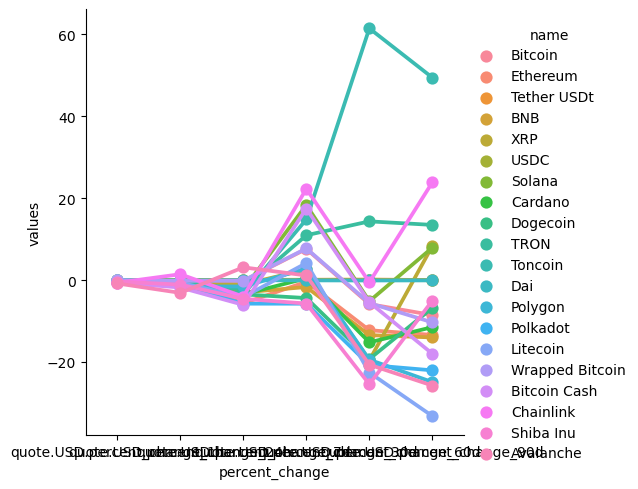

In [24]:
sns.catplot(x = 'percent_change', y = 'values', hue = 'name', data = df8, kind = 'point')

In [29]:
df9 = df[['name', 'quote.USD.price', 'timestamp']]
df9 = df9.query("name == 'Bitcoin'")
df9

,name,quote.USD.price,timestamp
0,Bitcoin,27864.827567,2023-10-09 00:28:03.564250
0,Bitcoin,27857.769611,2023-10-09 00:29:02.893164


In [31]:
sns.lineplot(x = 'timestamp', y = 'quote.USD.price', data = df9 )

C:\Users\akinl\anaconda3\lib\site-packages\seaborn\_core.py:1057: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  comp_col.loc[orig.index] = pd.to_numeric(axis.convert_units(orig))


ValueError: cannot reindex on an axis with duplicate labels

In [26]:
df9

,name,quote.USD.price,timestamp
0,Bitcoin,27864.827567,2023-10-09 00:28:03.564250
1,Ethereum,1629.258061,2023-10-09 00:28:03.564250
2,Tether USDt,1.000423,2023-10-09 00:28:03.564250
3,BNB,210.976726,2023-10-09 00:28:03.564250
4,XRP,0.516969,2023-10-09 00:28:03.564250
5,USDC,0.999900,2023-10-09 00:28:03.564250
6,Solana,23.148878,2023-10-09 00:28:03.564250
7,Cardano,0.255337,2023-10-09 00:28:03.564250
8,Dogecoin,0.060854,2023-10-09 00:28:03.564250
9,TRON,0.087792,2023-10-09 00:28:03.564250
